# Creating Functions

## Overview

### Questions

- How can I define new functions?
- What’s the difference between defining and calling a function?
- What happens when I call a function?


### Objectives

-  Define a function that takes parameters.
- Return a value from a function.
- Test and debug a function.
- Set default values for function parameters.
- Explain why we should divide programs into small, single-purpose functions.

## Content

### Writing functions

In [1]:
def fahr_to_celsius(temp):
    return ((temp - 32) * (5/9))

### Examining a function definition

![Labeled parts of a Python function definition](../fig/python-function.svg)

In [2]:
fahr_to_celsius(32)

0.0

In [3]:
print('freezing point of water:', fahr_to_celsius(32), 'C')
print('boiling point of water:', fahr_to_celsius(212), 'C')

freezing point of water: 0.0 C
boiling point of water: 100.0 C


### Composing functions

In [4]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

In [5]:
print('freezing point of water in Kelvin:', celsius_to_kelvin(0))

freezing point of water in Kelvin: 273.15


In [6]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


#### Exercise: 'fence' function

Write a function called `fence` that takes two parameters called `original` and `wrapper` and returns a new string that has the wrapper character at the beginning and end of the original.

E.g. `fence('oo', 'n')` -> `'noon'`

As an extension, write another function that reverses a string, then fences it with a character (try and use your fence function). 

E.g. `reverse_fence(’olli’, ‘w’)` → `‘willow’`

Hint: remember you can slice strings in steps of n with `string[::n]` (how can you get it to take steps backwards?)

##### Solution

In [7]:
def fence(original, wrapper):
    return wrapper + original + wrapper

In [8]:
print(fence('oo', 'n'))

noon


In [9]:
def reverse_fence(original, wrapper):
    reverse = original[::-1]
    return fence(reverse, wrapper)

In [10]:
print(reverse_fence('olli', 'w'))

willow


#### Check your understanding: return versus print

Note that `return` and `print` are not interchangeable.

`print` is a Python function that prints data to the screen. It enables us, users, see the data. 

`return` statement, on the other hand, makes data visible to the program. 

What will we see if we execute the following?

In [11]:
def add(a, b):
    print(a + b)

A = add(7, 3)
print(A)

10
None


### Variable scope

Earlier we created variables inside functions, `temp`, `temp_c`, `temp_f`, and `temp_k`. We refer to these variables as `local` variables because they no longer exist once the function is done executing. If a variable is defined outside of a function, it is `global`.

In [12]:
print('Again, temp in Kelvin was:', temp_k)

NameError: name 'temp_k' is not defined

In [13]:
temp_kelvin = fahr_to_kelvin(212.0)
print('temp in kelvin was:', temp_kelvin)

temp in kelvin was: 373.15


In [14]:
def print_temperatures():
    print('temp in Kelvin:', temp_kelvin)

In [15]:
print_temperatures()

temp in Kelvin: 373.15


#### Check your understanding: variables inside and outside functions

What does the following piece of code display when run — and why?

In [16]:
f = 0
k = 0

def f2k(f):
    k = ((f - 32) * (5.0 / 9.0)) + 273.15
    return k

print(f2k(8))
print(f2k(41))
print(f2k(32))

print(k)

259.81666666666666
278.15
273.15
0


### Tidying up

In Python, functions are not required to include a return statement and can be used for the sole purpose of grouping together pieces of code that conceptually do one thing.

In [17]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def visualise(filename):
    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.plot(np.mean(data, axis=0))
    axes1.set_ylabel('average')

    axes2.plot(np.max(data, axis=0))
    axes2.set_ylabel('max')

    axes3.plot(np.min(data, axis=0))
    axes3.set_ylabel('min')

    fig.tight_layout()
    plt.show()

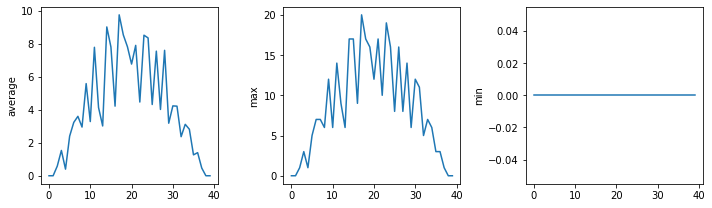

In [20]:
visualise('inflammation-03.csv')

In [22]:
def detect_problems(filename):
    data = np.loadtxt(fname=filename, delimiter=',')

    if np.max(data, axis=0)[0] == 0 and np.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif np.sum(np.min(data, axis=0)) == 0:
        print('suspicious looking minima add up to zero')
    else:
        print('seems OK!')

In [23]:
filenames = glob.glob('inflammation*.csv')
filenames = sorted(filenames)

In [24]:
print(filenames)

['inflammation-01.csv', 'inflammation-02.csv', 'inflammation-03.csv', 'inflammation-04.csv', 'inflammation-05.csv', 'inflammation-06.csv', 'inflammation-07.csv', 'inflammation-08.csv', 'inflammation-09.csv', 'inflammation-10.csv', 'inflammation-11.csv', 'inflammation-12.csv']


inflammation-01.csv


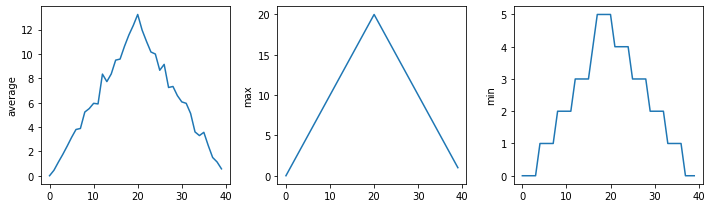

Suspicious looking maxima!
inflammation-02.csv


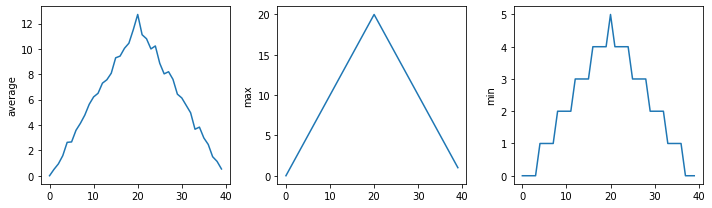

Suspicious looking maxima!
inflammation-03.csv


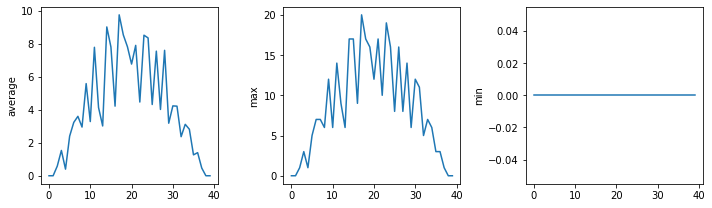

suspicious looking minima add up to zero


In [25]:
for filename in filenames[:3]:
    print(filename)
    visualise(filename)
    detect_problems(filename)

### Docstrings

In [26]:
# visualise(filename)
# takes a filename and plots the mean, max and min of the data inside
def visualise(filename):
    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.plot(np.mean(data, axis=0))
    axes1.set_ylabel('average')

    axes2.plot(np.max(data, axis=0))
    axes2.set_ylabel('max')

    axes3.plot(np.min(data, axis=0))
    axes3.set_ylabel('min')

    fig.tight_layout()
    plt.show()

In [27]:
def visualise(filename):
    """
    This function takes a filename and plots the 
    mean, max and min of the data inside
    """
    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.plot(np.mean(data, axis=0))
    axes1.set_ylabel('average')

    axes2.plot(np.max(data, axis=0))
    axes2.set_ylabel('max')

    axes3.plot(np.min(data, axis=0))
    axes3.set_ylabel('min')

    fig.tight_layout()
    plt.show()

In [28]:
help(visualise)

Help on function visualise in module __main__:

visualise(filename)
    This function takes a filename and plots the 
    mean, max and min of the data inside



### Defining defaults

In [29]:
type(data)

numpy.ndarray

In [30]:
np.loadtxt('inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [31]:
np.loadtxt(fname='inflammation-01.csv', delimiter=',')

array([[0., 0., 1., ..., 3., 0., 0.],
       [0., 1., 2., ..., 1., 0., 1.],
       [0., 1., 1., ..., 2., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

In [32]:
np.loadtxt(fname='inflammation-01.csv', ',')

SyntaxError: positional argument follows keyword argument (2502874277.py, line 1)

In [33]:
def visualise(filename, fig_size = (10.0, 3.0)):
    """
    This function takes a filename and plots the 
    mean, max and min of the data inside
    """
    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=fig_size)

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.plot(np.mean(data, axis=0))
    axes1.set_ylabel('average')

    axes2.plot(np.max(data, axis=0))
    axes2.set_ylabel('max')

    axes3.plot(np.min(data, axis=0))
    axes3.set_ylabel('min')

    fig.tight_layout()
    plt.show()

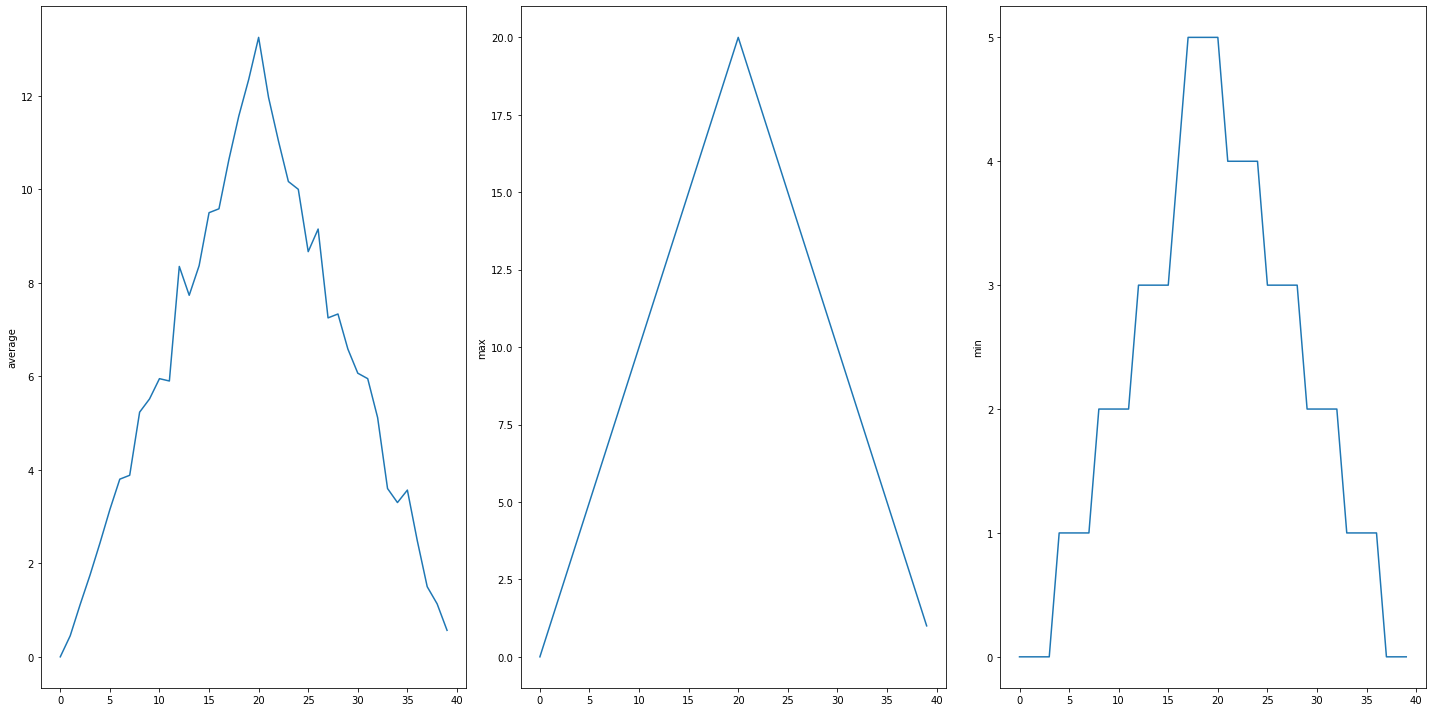

In [35]:
visualise('inflammation-01.csv', fig_size=(20.0, 10.0))

In [46]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

In [43]:
display(c=77)

a: 1 b: 2 c: 77


In [ ]:
help(np.loadtxt)

#### Check your understanding: mixing default and non-default parameters

What do you expect will be printed?

In [48]:
def numbers(one, two=2, three, four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n

print(numbers(1, three=3))

SyntaxError: non-default argument follows default argument (2203058596.py, line 1)

Given that, what does the following piece of code display when run?

In [50]:
def func(a, b=3, c=6):
    print('a: ', a, 'b: ', b, 'c:', c)

result = func(-1, 2)
print(result)

a:  -1 b:  2 c: 6
None


### Readable functions

In [ ]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))

## Key Points

- Define a function using `def function_name(parameter):`.
- The body of a function must be indented.
- Call a function using `function_name(value)`.
- Variables defined within a function can only be seen and used within the body of the function.
- Global variables (those created outside functions) can be accessed anywhere.
- Use `help(thing)` to get the docstring of a function.
- Likewise, we can write docstrings for our own functions.
- You can specify default values for function parameters. These will be used if not specified.